In [27]:
import numpy as np
from pymc3 import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# set random seed for reproducibility
np.random.seed(12345)

x = np.arange(5,400,10)*1e3

# Parameters for gaussian
amp_true = 0.2
size_true = 1.8
ps_true = 0.1

#Gaussian function
gauss = lambda x,amp,size,ps: amp*np.exp(-1*(np.pi**2/(3600.*180.)*size*x)**2/(4.*np.log(2.)))+ps
f_true = gauss(x=x,amp=amp_true, size=size_true, ps=ps_true )

# add noise to the data points
noise = np.random.normal(size=len(x)) * .02 
f = f_true + noise 
f_error = np.ones_like(f_true)*0.05*f.max()



In [15]:
with Model() as model3:
    amp = Uniform('amp', 0.05, 0.4, testval= 0.15)
    size = Uniform('size', 0.5, 2.5, testval= 1.0)
    ps = Normal('ps', 0.13, 40, testval=0.15)

    gauss=Deterministic('gauss',amp*np.exp(-1*(np.pi**2*size*x/(3600.*180.))**2/(4.*np.log(2.)))+ps)

    y =Normal('y', mu=gauss, tau=1.0/f_error**2, observed=f)

  
    trace=sample(2000)



Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -72.539:  13%|█▎        | 25946/200000 [00:04<00:27, 6298.97it/s]
Convergence archived at 26100
Interrupted at 26,100 [13%]: Average Loss = 4,933
100%|██████████| 2500/2500 [00:03<00:00, 632.33it/s]


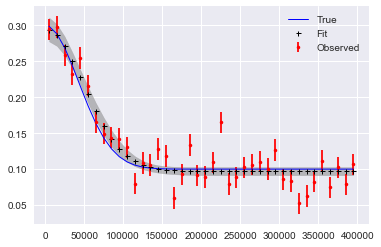

In [29]:
# extract and plot results
y_min = np.percentile(trace.gauss,2.5,axis=0)
y_max = np.percentile(trace.gauss,97.5,axis=0)
y_fit = np.percentile(trace.gauss,50,axis=0)
plt.plot(x,f_true,'b', marker='None', ls='-', lw=1, label='True')
plt.errorbar(x,f,yerr=f_error, color='r', marker='.', ls='None', label='Observed')
plt.plot(x,y_fit,'k', marker='+', ls='None', ms=5, mew=1, label='Fit')
plt.fill_between(x, y_min, y_max, color='0.5', alpha=0.5)
plt.legend()

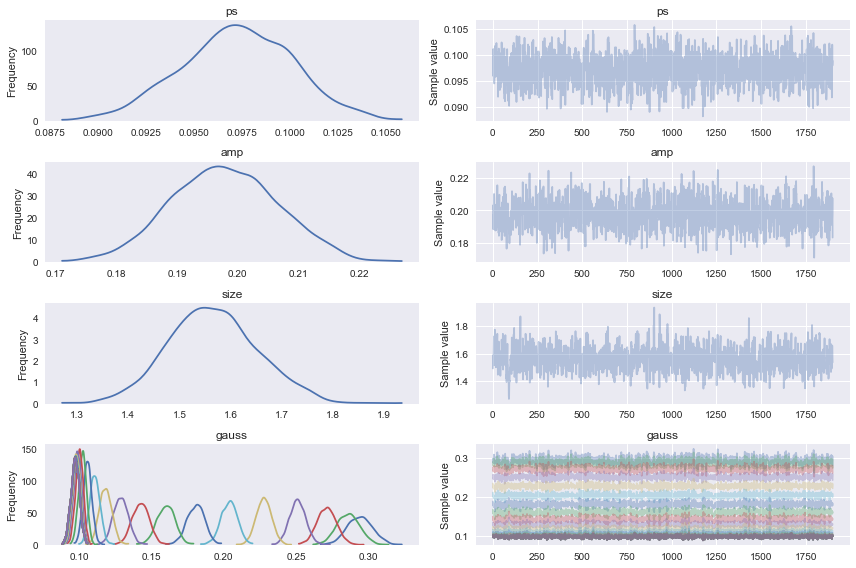

In [30]:
traceplot(trace[100:])
plt.tight_layout();

In [32]:
summary(trace)


ps:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.097            0.003            0.000            [0.092, 0.103]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.092          0.095          0.097          0.099          0.103


amp:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.198            0.009            0.000            [0.181, 0.215]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.181          0.192          0.198          0.204          0.215


size:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------

https://stackoverflow.com/questions/24804298/fit-a-non-linear-function-to-data-observations-with-pymcmc-pymc